In [1]:
import matplotlib as plt
import pandas as pd

df = pd.read_csv("./accidents_statistics2021/honhyo_2021.csv", encoding='cp932')
print(len(df))

FileNotFoundError: ignored

<Axes: >

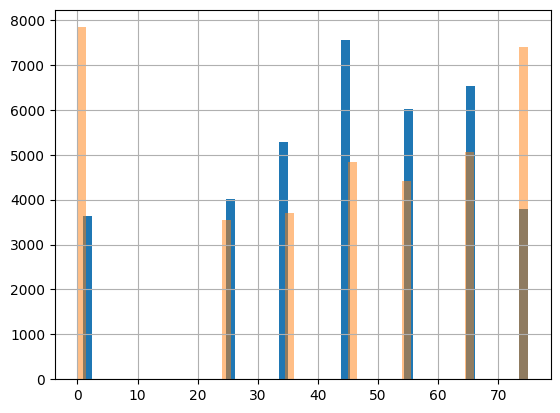

In [ ]:
df_person = df[df["事故類型"]==1].reset_index()
df_person['年齢（当事者A）'].hist(bins=50)
df_person['年齢（当事者B）'].hist(bins=50, alpha=0.5)

In [ ]:
df_tokyo = df[df['都道府県コード']==30]

In [ ]:
print(len(df_tokyo)/len(df)*100)

9.042713534908714


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '踏切-遮断器あり'),
  Text(1, 0, '単路-トンネル'),
  Text(2, 0, '単路-橋'),
  Text(3, 0, '単路-カーブ・屈折'),
  Text(4, 0, '一般交通の場所'),
  Text(5, 0, '交差点付近-その他'),
  Text(6, 0, '交差点-その他'),
  Text(7, 0, '単路-その他')])

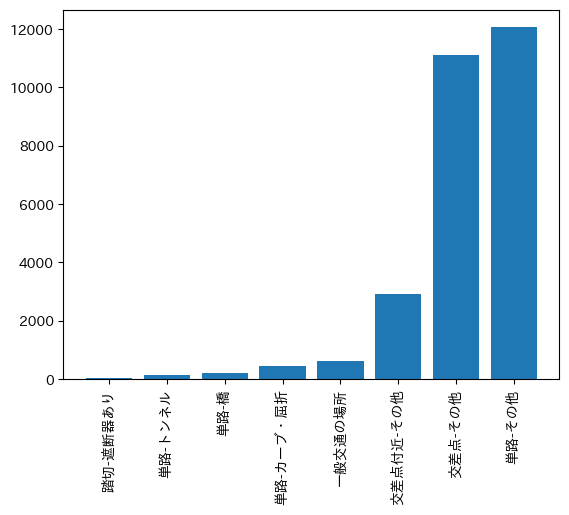

In [ ]:

import collections
RoadType_dict = {
    31:"交差点-環状交差点",
    1:"交差点-その他",
    37:"交差点付近-環状交差点付近",
    7:"交差点付近-その他",
    11:"単路-トンネル",
    12:"単路-橋",
    13:"単路-カーブ・屈折",
    14:"単路-その他",
    21:"踏切-遮断器あり",
    22:"踏切-警報機のみ",
    23:"踏切-設備なし",
    00:"一般交通の場所"
    }

RoadType_count=[]
for i in range(len(df_tokyo['道路形状'])):
    RoadType_count.append(RoadType_dict[df_tokyo['道路形状'].iloc[i]])


RoadType_sum=dict(collections.Counter(RoadType_count))

#print(RoadType_sum)
x=[]
y=[]
sorted_RoadType_sum = dict(sorted(RoadType_sum.items(), key=lambda x:x[1]))
for i in sorted_RoadType_sum.keys():
    x.append(str(i))
for i in sorted_RoadType_sum.values():
    y.append(int(i))


#df_RoadType =
plt.pyplot.bar(x, y)
plt.pyplot.xticks(rotation=90)

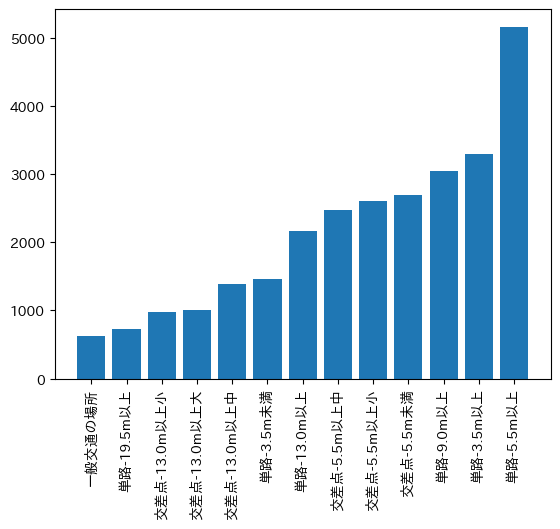

In [ ]:

import collections
RoadWidth_dict = {
    1:"単路-3.5m未満",
    2:"単路-3.5m以上",
    3:"単路-5.5m以上",
    4:"単路-9.0m以上",
    5:"単路-13.0m以上",
    6:"単路-19.5m以上",
    11:"交差点-5.5m未満",
    14:"交差点-5.5m以上小",
    15:"交差点-5.5m以上中",
    17:"交差点-13.0m以上小",
    18:"交差点-13.0m以上中",
    19:"交差点-13.0m以上大",
    00:"一般交通の場所"
    }

RoadWidth_count=[]
for i in range(len(df_tokyo['車道幅員'])):
    RoadWidth_count.append(RoadWidth_dict[df_tokyo['車道幅員'].iloc[i]])


RoadWidth_sum=dict(collections.Counter(RoadWidth_count))

#print(RoadType_sum)
x=[]
y=[]
sorted_RoadWidth_sum = dict(sorted(RoadWidth_sum.items(), key=lambda x:x[1]))
for i in sorted_RoadWidth_sum.keys():
    x.append(str(i))
for i in sorted_RoadWidth_sum.values():
    y.append(int(i))


#df_RoadType =
a = plt.pyplot.bar(x, y)
plt.pyplot.xticks(rotation=90)
plt.pyplot.savefig("accident road type.png", dpi=300)

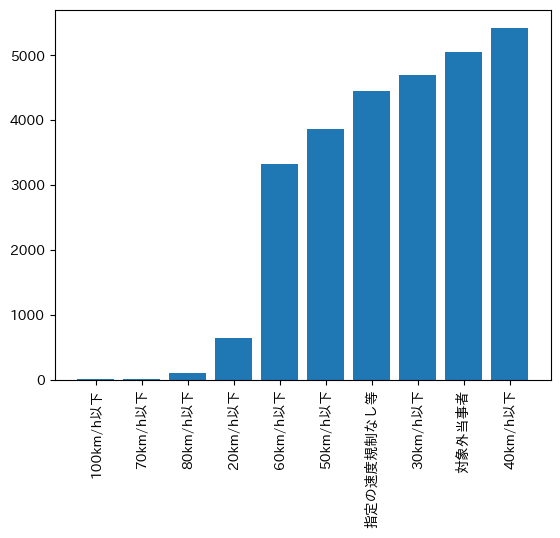

In [ ]:

import collections
RoadSpeed_dict = {
    1:"20km/h以下",
    2:"30km/h以下",
    3:"40km/h以下",
    4:"50km/h以下",
    5:"60km/h以下",
    6:"70km/h以下",
    7:"80km/h以下",
    8:"100km/h以下",
    9:"100km/h超過",
    10:"指定の速度規制なし等",
    00:"対象外当事者"
    }

RoadSpeed_count=[]
for i in range(len(df_tokyo['速度規制（指定のみ）（当事者A）'])):
    RoadSpeed_count.append(RoadSpeed_dict[df_tokyo['速度規制（指定のみ）（当事者A）'].iloc[i]])


RoadSpeed_sum=dict(collections.Counter(RoadSpeed_count))

#print(RoadType_sum)
x=[]
y=[]
sorted_RoadSpeed_sum = dict(sorted(RoadSpeed_sum.items(), key=lambda x:x[1]))
for i in sorted_RoadSpeed_sum.keys():
    x.append(str(i))
for i in sorted_RoadSpeed_sum.values():
    y.append(int(i))


#df_RoadType =
b= plt.pyplot.bar(x, y)
plt.pyplot.xticks(rotation=90)
plt.pyplot.savefig("accident speed.png", dpi=300)

(22.0, 42.0)

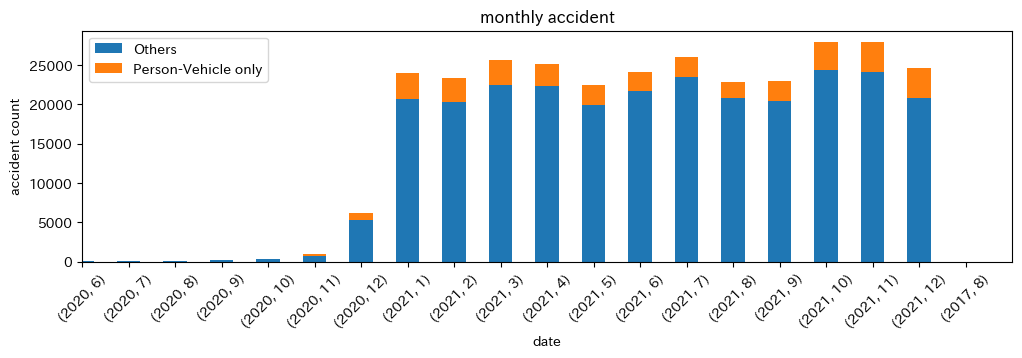

In [ ]:
# visu 2: monthly accident bar plot
monthly_accident_count = df[df["事故類型"]!=1].groupby(['発生日時　　年', '発生日時　　月']).size()
monthly_person_accident_count = df[df["事故類型"]==1].groupby(['発生日時　　年', '発生日時　　月']).size()
df_monthly_count = pd.concat([monthly_accident_count, monthly_person_accident_count], axis=1)
df_monthly_count.columns = ["Others","Person-Vehicle only"]

ax = df_monthly_count.plot(kind="bar", figsize=(12,3), stacked=True, rot=45)
ax.set_xlabel("date")
ax.set_ylabel("accident count")
ax.set_title("monthly accident")
ax.set_xlim(len(df_monthly_count) - 20,len(df_monthly_count))

3417


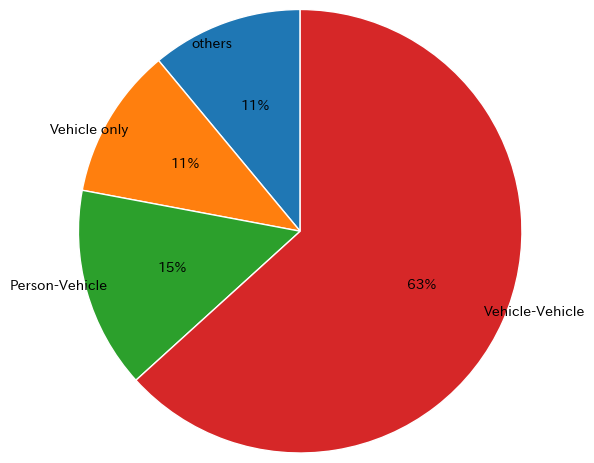

In [ ]:
# visu 2: monthly accident bar plot
type_person_accident_count = len(df_tokyo[df_tokyo['事故類型']==1])
type_carVScar_accident_count = len(df_tokyo[df_tokyo['事故類型']==21])
type_caronly_accident_count = len(df_tokyo[df_tokyo['事故類型']==41])
other = len(df_tokyo[df_tokyo['事故類型']==41])
print(type_caronly_accident_count)
df_type_count = [other, type_caronly_accident_count, type_person_accident_count, type_carVScar_accident_count]
df_type_count_name = ["others", "Vehicle only", "Person-Vehicle", "Vehicle-Vehicle"]

plt.pyplot.pie(df_type_count, labels=df_type_count_name,autopct='%.f%%',radius=1.5,labeldistance=0.9, startangle=90,wedgeprops={'linewidth': 1, 'edgecolor':"white"})

plt.pyplot.savefig("accident type ratio.png", dpi=300)

#ax = df_type_count.plot(kind="bar", figsize=(12,3), stacked=True, rot=45)